In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
star = pd.read_csv('stars_larger.csv',header=1)
star.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237680311226400971,352.476340,32.083681,19.22127,18.89125,18.77551,18.64375,18.57708,8111,301,4,37,8743832275874240512,QSO,1.653339,7766,58395,340
1,1237680311227187450,354.438295,32.195653,19.26509,18.22012,17.82656,17.64138,17.58769,8111,301,4,49,8737113155032078336,STAR,-0.000424,7760,58080,472
2,1237657401336660259,119.622158,30.650825,19.20690,17.57562,16.51169,16.00991,15.63780,2777,301,3,78,1194649389579134976,GALAXY,0.157430,1061,52641,253
3,1237657401334890829,116.645997,27.560866,18.95453,17.31941,16.45584,16.06454,15.73799,2777,301,3,51,1192374499635390464,GALAXY,0.081241,1059,52618,169
4,1237657401344983213,137.187349,43.596885,19.19234,17.65800,16.77064,16.33491,16.03147,2777,301,3,205,935790811474323456,GALAXY,0.176956,831,52294,611


In [3]:
type(star)


pandas.core.frame.DataFrame

In [4]:
star["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in star["class"]]

In [246]:
star['class'].value_counts(normalize=False)

0    252021
1    193382
2     54590
Name: class, dtype: int64

In [6]:
star.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
star = star.drop(columns=['rerun','run','objid','specobjid','field','camcol'])#'plate','fiber_ID','alpha','delta','cam_col','MJD',
star.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,352.476340,32.083681,19.22127,18.89125,18.77551,18.64375,18.57708,2,1.653339,7766,58395,340
1,354.438295,32.195653,19.26509,18.22012,17.82656,17.64138,17.58769,1,-0.000424,7760,58080,472
2,119.622158,30.650825,19.20690,17.57562,16.51169,16.00991,15.63780,0,0.157430,1061,52641,253
3,116.645997,27.560866,18.95453,17.31941,16.45584,16.06454,15.73799,0,0.081241,1059,52618,169
4,137.187349,43.596885,19.19234,17.65800,16.77064,16.33491,16.03147,0,0.176956,831,52294,611


In [9]:
star = star[star['z']>0]

In [10]:
star = star[star['i']>0]

In [11]:
qso_df = star[star['class']==2]
star_df = star[star['class']==1]
galaxy_df = star[star['class']==0]

In [12]:
star.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499993 entries, 0 to 499999
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ra        499993 non-null  float64
 1   dec       499993 non-null  float64
 2   u         499993 non-null  float64
 3   g         499993 non-null  float64
 4   r         499993 non-null  float64
 5   i         499993 non-null  float64
 6   z         499993 non-null  float64
 7   class     499993 non-null  int64  
 8   redshift  499993 non-null  float64
 9   plate     499993 non-null  int64  
 10  mjd       499993 non-null  int64  
 11  fiberid   499993 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 49.6 MB


In [13]:
star.describe()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
count,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000
mean,179.625495,24.221293,18.633648,17.411174,16.889858,16.637906,16.481748,0.605132,0.174562,2632.407660,53949.143650,351.514477
std,77.408934,19.782584,0.830221,0.985288,1.131390,1.209684,1.283909,0.676248,0.441004,2235.645106,1555.680652,216.625230
min,0.001914,-19.702719,10.170250,9.300097,8.814259,7.652014,7.795724,0.000000,-0.010111,266.000000,51578.000000,1.000000
25%,140.243605,7.284964,18.206620,16.851330,16.200420,15.870100,15.626090,0.000000,0.000003,1201.000000,52735.000000,171.000000
50%,181.808077,22.698354,18.867370,17.517710,16.901690,16.614660,16.445320,0.000000,0.045167,2101.000000,53757.000000,344.000000
75%,224.340312,39.086725,19.267930,18.060320,17.593240,17.355760,17.249480,1.000000,0.096057,2915.000000,54599.000000,511.000000
max,359.999615,84.852149,19.600000,19.996050,33.209920,32.349170,30.017040,2.000000,7.011245,12547.000000,58932.000000,1000.000000


In [14]:
len(star.plate.value_counts())

6489

In [15]:
len(star.fiberid.value_counts())

1000

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
star['plate'] = label_encoder.fit_transform(star['plate'])
star['fiberid'] = label_encoder.fit_transform(star['fiberid'])
# No need to one hot encode RF
# Probably should make these variables non int when running model


In [ ]:
+,

In [17]:
# Rando Forest 1: redone by label encoding two columns fiber id and plate
# There is intentionality in choosing and aiming each fiber
# Do the different fiber plate combos work slightly differently? 

In [18]:
X = star.drop(columns=['class'])
y = star['class']


In [19]:
sm = SMOTE(random_state=512)
print('Original dataset shape %s' % Counter(y))
X, y = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 252021, 1: 193382, 2: 54590})
Resampled dataset shape Counter({2: 252021, 1: 252021, 0: 252021})


In [20]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=512)

In [21]:
rf =RandomForestClassifier(bootstrap=False)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9930164642146696

In [22]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     62975
           1       1.00      1.00      1.00     62970
           2       0.99      0.99      0.99     63071

    accuracy                           0.99    189016
   macro avg       0.99      0.99      0.99    189016
weighted avg       0.99      0.99      0.99    189016



In [25]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[62509   107   359]
 [   53 62917     0]
 [  794     7 62270]]


### The random forrest model with only spectral info

In [26]:
star_spect_df = star[['u','g','r','i','z','class','redshift']]

In [27]:
star_spect_df.head()

,u,g,r,i,z,class,redshift
0,19.22127,18.89125,18.77551,18.64375,18.57708,2,1.653339
1,19.26509,18.22012,17.82656,17.64138,17.58769,1,-0.000424
2,19.20690,17.57562,16.51169,16.00991,15.63780,0,0.157430
3,18.95453,17.31941,16.45584,16.06454,15.73799,0,0.081241
4,19.19234,17.65800,16.77064,16.33491,16.03147,0,0.176956


In [42]:
star_spect_df.describe()

,u,g,r,i,z,class,redshift
count,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000,499993.000000
mean,18.633648,17.411174,16.889858,16.637906,16.481748,0.605132,0.174562
std,0.830221,0.985288,1.131390,1.209684,1.283909,0.676248,0.441004
min,10.170250,9.300097,8.814259,7.652014,7.795724,0.000000,-0.010111
25%,18.206620,16.851330,16.200420,15.870100,15.626090,0.000000,0.000003
50%,18.867370,17.517710,16.901690,16.614660,16.445320,0.000000,0.045167
75%,19.267930,18.060320,17.593240,17.355760,17.249480,1.000000,0.096057
max,19.600000,19.996050,33.209920,32.349170,30.017040,2.000000,7.011245


In [29]:
Xs = star_spect_df.drop(columns=['class'])
ys = star_spect_df['class']

In [31]:
sm2 = SMOTE(random_state=512)
print('Original dataset shape %s' % Counter(ys))
Xs, ys = sm.fit_resample(Xs, ys)
print('Resampled dataset shape %s' % Counter(ys))

Original dataset shape Counter({0: 252021, 1: 193382, 2: 54590})
Resampled dataset shape Counter({2: 252021, 1: 252021, 0: 252021})


In [197]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs,ys,random_state=512)

In [44]:
rf1 =RandomForestClassifier(bootstrap=False)
rf1.fit(Xs_train,ys_train)

In [45]:
rf1.score(Xs_test,ys_test)

0.9937571422525078

In [46]:
print(classification_report(ys_test, rf1.predict(Xs_test)))
print(confusion_matrix(ys_test, rf1.predict(Xs_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     62975
           1       1.00      1.00      1.00     62970
           2       0.99      0.99      0.99     63071

    accuracy                           0.99    189016
   macro avg       0.99      0.99      0.99    189016
weighted avg       0.99      0.99      0.99    189016

[[62559    86   330]
 [   47 62923     0]
 [  709     8 62354]]


In [47]:
sorted([(rf1.feature_importances_[i], rf1.feature_names_in_[i]) for i in range(len(rf1.feature_names_in_))])

[(0.043033563742905005, 'u'),
 (0.053165429085279735, 'g'),
 (0.08603871489334995, 'z'),
 (0.10421700315230636, 'i'),
 (0.12899908557904344, 'r'),
 (0.5845462035471154, 'redshift')]

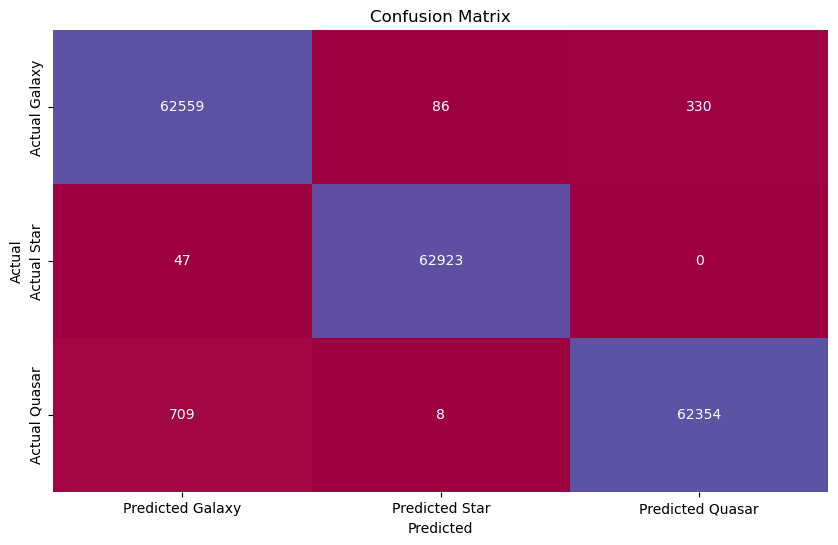

In [244]:
cm = confusion_matrix(ys_test, rf1.predict(Xs_test))

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral", cbar=False,
            xticklabels=["Predicted Galaxy", "Predicted Star","Predicted Quasar" ],
            yticklabels=["Actual Galaxy", "Actual Star","Actual Quasar"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('imgs/confusion_matirix.png')
plt.show()

In [ ]:
qso_df.shape , star_df.shape, galaxy_df.shape

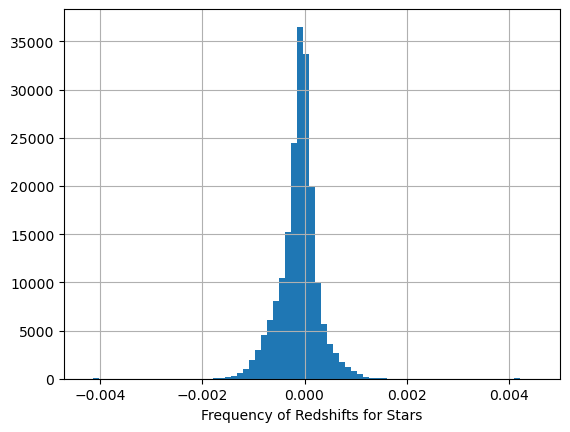

In [69]:
star_df.redshift.hist(bins=75)
plt.xlabel('Frequency of Redshifts for Stars')
plt.savefig('imgs/star_redshifts.png');

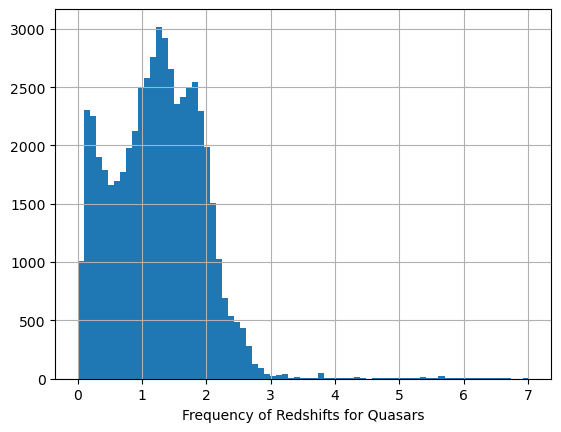

In [70]:
qso_df.redshift.hist(bins=75)
plt.xlabel('Frequency of Redshifts for Quasars')
plt.savefig('imgs/quasar_redshifts.png');

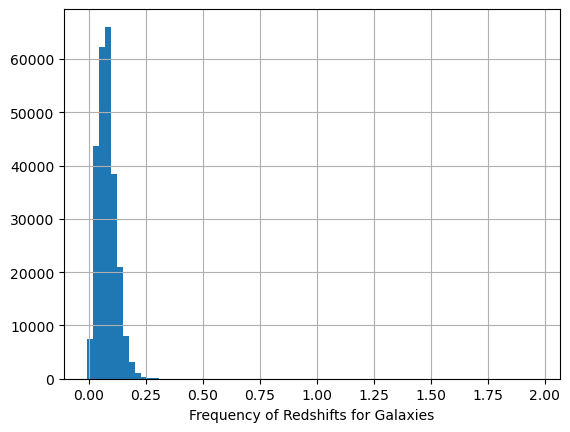

In [71]:
galaxy_df.redshift.hist(bins=75)
plt.xlabel('Frequency of Redshifts for Galaxies')
plt.savefig('imgs/galaxy_redshifts.png');

In [198]:
preds = rf1.predict(Xs_test)
mismatched_indices = (preds != ys_test)
mismatched_objects = Xs_test[mismatched_indices]
predicted_label = preds[mismatched_indices]

In [199]:
label_df.head()

,class
0,2
1,0
2,1
3,0
4,0


In [200]:
mismatched_objects.reset_index(inplace=True)

In [201]:
mismatched_objects.drop(columns=['index'],inplace=True)

C:\Users\seanh\AppData\Local\Temp\ipykernel_20468\299928453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_objects.drop(columns=['index'],inplace=True)


In [202]:
mismatched_objects.head()

,u,g,r,i,z,redshift
0,17.534270,16.307930,15.685260,15.291530,15.071530,0.094206
1,18.735360,17.552120,16.883430,16.530630,16.283590,0.112199
2,17.916200,15.794500,15.358940,16.212790,15.832750,-0.000040
3,16.422180,14.950810,14.569240,14.403980,14.465300,0.001880
4,18.684714,16.976779,16.164286,15.707167,15.431194,0.084700


In [203]:
type(ys_test)

pandas.core.series.Series

In [204]:
mismatched_objects['predicted_class'] = predicted_label

C:\Users\seanh\AppData\Local\Temp\ipykernel_20468\1626286119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_objects['predicted_class'] = predicted_label


In [206]:
y_true = ys_test[mismatched_indices].reset_index().drop(columns=['index'])['class']

In [207]:
mismatched_objects['true_class'] = y_true

C:\Users\seanh\AppData\Local\Temp\ipykernel_20468\2188705668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mismatched_objects['true_class'] = y_true


In [212]:
mismatched_objects.head()

,u,g,r,i,z,redshift,predicted_class,true_class
0,17.534270,16.307930,15.685260,15.291530,15.071530,0.094206,2,0
1,18.735360,17.552120,16.883430,16.530630,16.283590,0.112199,0,2
2,17.916200,15.794500,15.358940,16.212790,15.832750,-0.000040,1,0
3,16.422180,14.950810,14.569240,14.403980,14.465300,0.001880,0,1
4,18.684714,16.976779,16.164286,15.707167,15.431194,0.084700,0,2


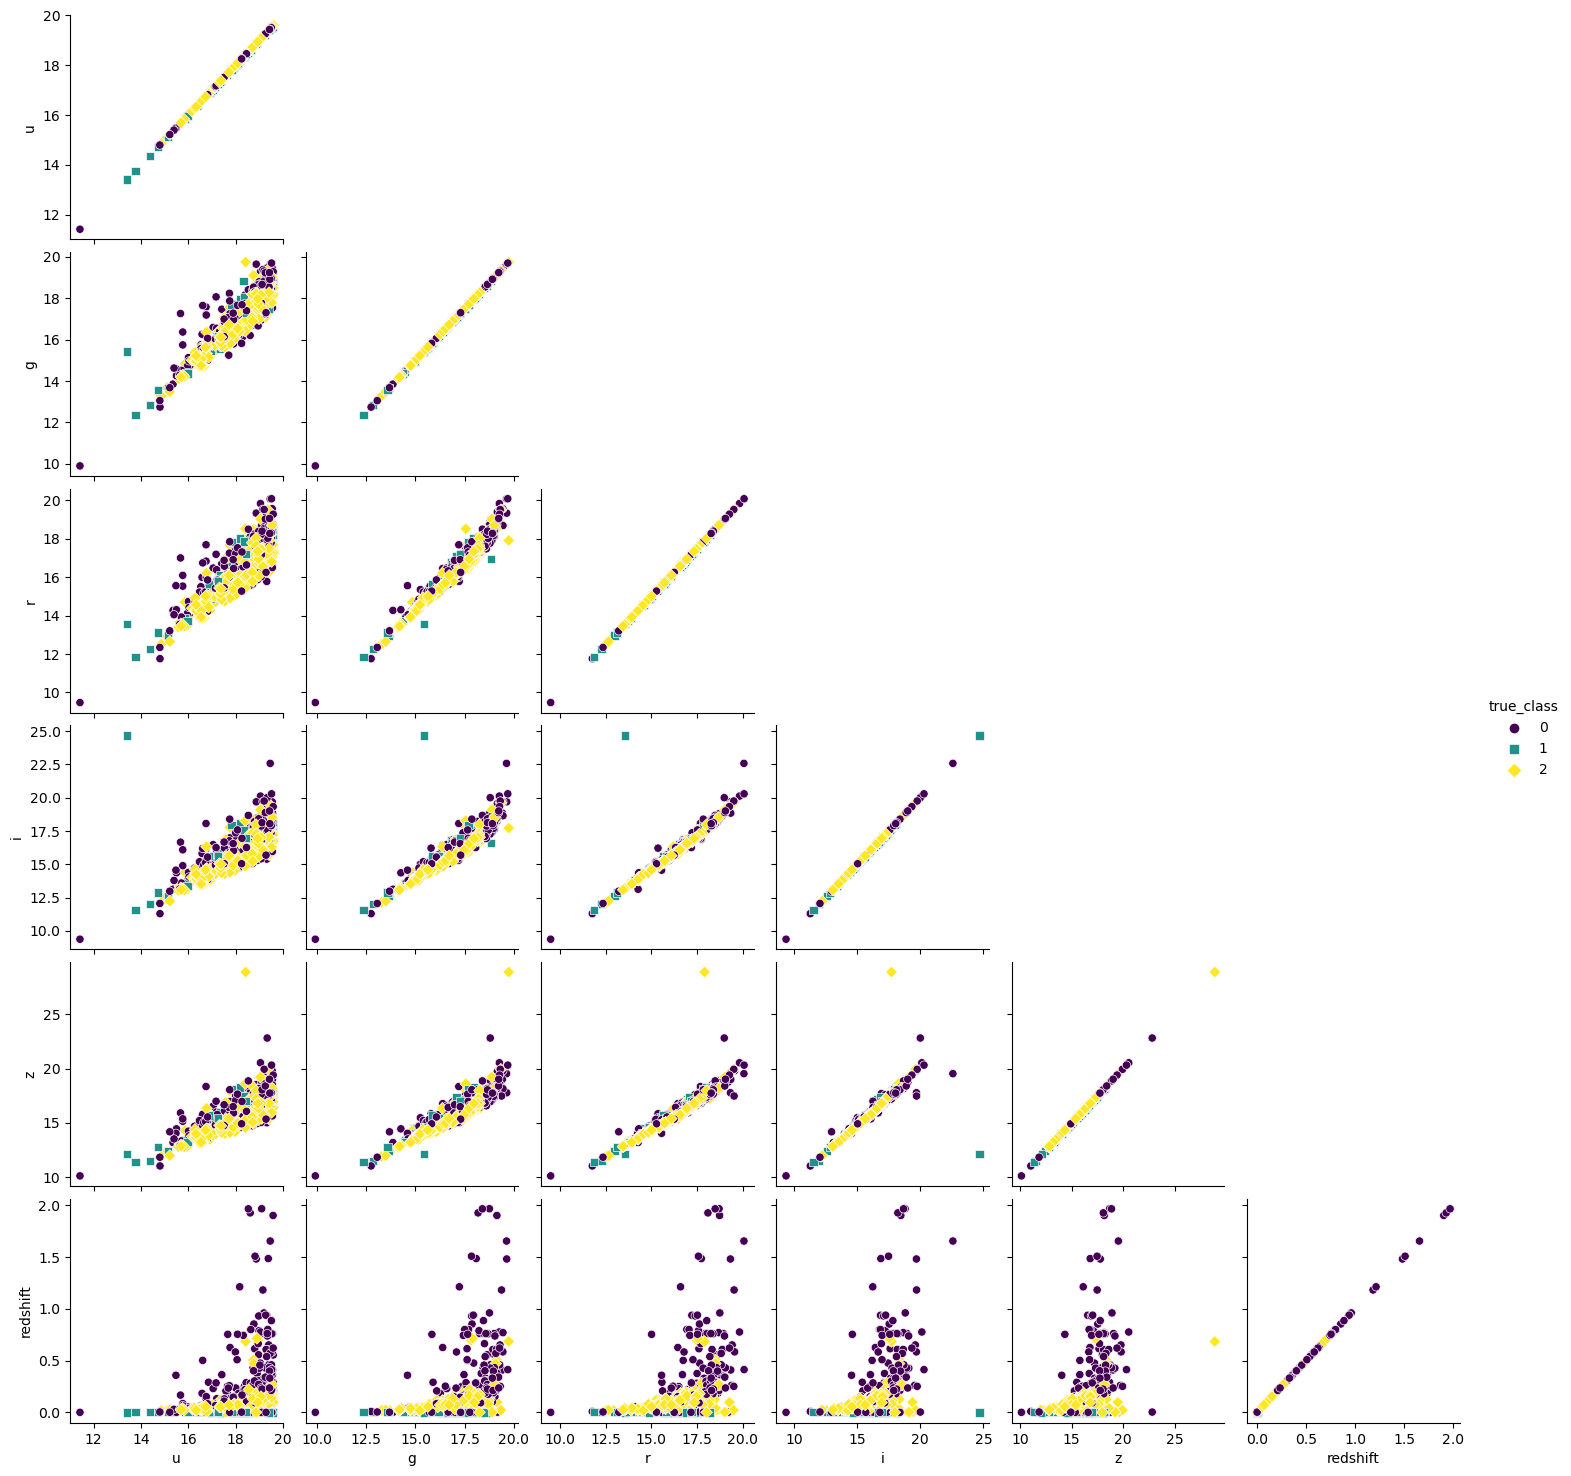

In [247]:
sns.pairplot(mismatched_objects.drop(columns = ['predicted_class']), hue='true_class', palette='viridis',markers=["o", "s", "D"],
         corner=True,diag_kind=None,)
plt.savefig('imgs/pairplot.png')

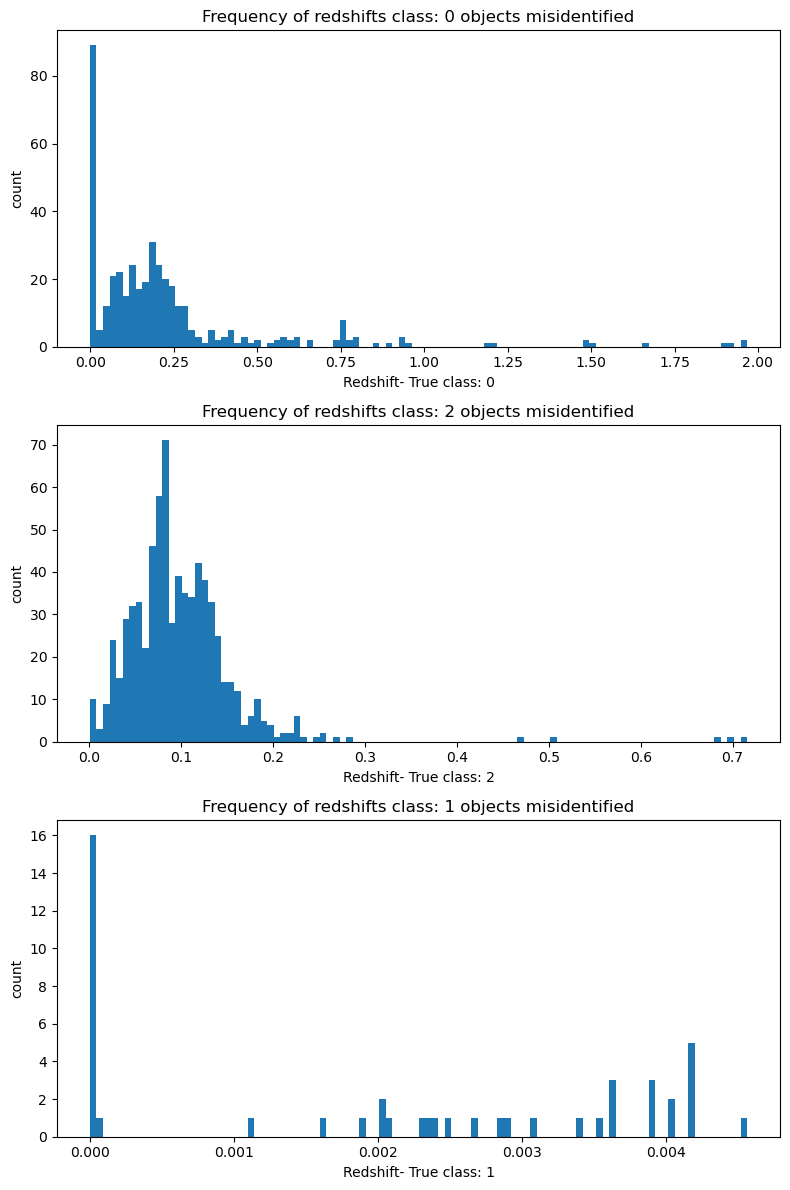

In [245]:
unique_classes = mismatched_objects['true_class'].unique()
fig, axes = plt.subplots(len(unique_classes), 1, figsize=(8, 4 * len(unique_classes)))

# Iterate over unique classes and create subplots
for i, class_label in enumerate(unique_classes):
    class_data = mismatched_objects[mismatched_objects['true_class'] == class_label]
    
    # Assuming 'feature1' and 'feature2' are the columns you want to visualize
    axes[i].hist(class_data['redshift'], label=class_label, bins = 100)
    axes[i].set_title(f'Frequency of redshifts class: {class_label} objects misidentified')
    axes[i].set_xlabel(f'Redshift- True class: {class_label}')
    axes[i].set_ylabel('count')
    

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('imgs/misclass_hists.png')
plt.show()


In [124]:
mismatched_objects.describe()

,u,g,r,i,z,redshift,class
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,18.488319,17.321742,16.650275,16.287249,16.073452,0.139171,0.638983
std,1.011863,1.152069,1.202853,1.285398,1.358432,0.196165,0.889200
min,11.417540,9.897096,9.474476,9.370869,10.099550,-0.001777,0.000000
25%,18.038847,16.768720,16.013808,15.575527,15.333268,0.054787,0.000000
50%,18.808320,17.510850,16.766294,16.345928,16.081568,0.096546,0.000000
75%,19.238832,18.091131,17.375782,16.980286,16.810679,0.151170,2.000000
max,19.597840,19.749150,20.079930,24.681410,28.916540,1.967574,2.000000


In [128]:
mismatched_objects[mismatched_objects['class']==2].describe()['redshift']

count    330.000000
mean       0.283693
std        0.311080
min        0.008621
25%        0.118681
50%        0.193725
75%        0.282882
max        1.967574
Name: redshift, dtype: float64

In [129]:
qso_df.describe()['redshift']

count    54590.000000
mean         1.236852
std          0.700487
min          0.000461
25%          0.712652
50%          1.246684
75%          1.731146
max          7.011245
Name: redshift, dtype: float64

In [132]:
mismatched_objects[mismatched_objects['class']==1].describe()['redshift']

count    94.000000
mean      0.000948
std       0.001383
min      -0.001777
25%       0.000000
50%       0.000184
75%       0.001825
max       0.004104
Name: redshift, dtype: float64

In [130]:
star_df.describe()['redshift']

count    193382.000000
mean         -0.000105
std           0.000409
min          -0.004268
25%          -0.000287
50%          -0.000078
75%           0.000083
max           0.004563
Name: redshift, dtype: float64

In [137]:
mismatched_objects[mismatched_objects['class']==0].describe()['redshift'].round(6)

count    756.000000
mean       0.093272
std        0.065606
min       -0.000000
25%        0.055778
50%        0.085270
75%        0.121347
max        0.715823
Name: redshift, dtype: float64

In [131]:
galaxy_df.describe()['redshift']

count    252021.000000
mean          0.078486
std           0.049850
min          -0.010111
25%           0.047993
50%           0.073509
75%           0.101203
max           1.967574
Name: redshift, dtype: float64

In [138]:
star_spect_df.columns

Index(['u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')

In [ ]:
star_df = star[star['class']==1]
 = star[star['class']==0]